Advanced Convolutional Neural Networks (CNNs) with CIFAR-10 dataset
=========

In this tutorial we will learn how to use more complex CNNs, showing that the training of a __deeper__ CNN can improve the performance of the model. We will also explore the concept of __data augmentation__ to understand how to increase the variability of the training set by, for example, rotating the original images to generate new training stimuli.

This tutorail will use the CIFAR-10 training set.


**CNN for CIFAR-10**

To work with more complex CNNs, we will now use a more complex training dataset called __CIFAR-10__. https://www.cs.toronto.edu/~kriz/cifar.html . CIFAR-10 is a benchamark machine learning set of low-resolution, colour images. It includes 60000 32x32 colour (using 3 RGB colour channels) images in these 10 classes of objects: airplane, automobile, bird, cat, deer, dog, frog, horse, ship, truck. Each class has 6000. There are 50000 training images and 10000 test images. This dataset is enclosed in the default Anaconda KERAS package. 


**Initialisation of the program**

The program starts with the importing of typical Keras and other Python service modules. 

In [1]:
# importing of modules for CIFAR-10 CNN 
from tensorflow.keras.datasets import cifar10
from tensorflow.keras import utils
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.optimizers import SGD, Adam, RMSprop

# importing of service libraries
import numpy as np
import matplotlib.pyplot as plt

print('Libraries imported.')

Libraries imported.


The following constant and variable definitions are needed for the network and training parameters.


In [2]:
#training constants
BATCH_SIZE = 128
N_EPOCH = 20 # use 20 for best initial results
N_CLASSES = 10
VERBOSE = 1
VALIDATION_SPLIT = 0.2
OPTIM = RMSprop()

print('Main variables initialised.')

Main variables initialised.


Constant definition for the training set images

In [3]:
# CIFAR_10 is a set of 60K images 32x32 pixels on 3 channels
IMG_CHANNELS = 3
IMG_ROWS = 32
IMG_COLS = 32

print('Image variables initialisation')

Image variables initialisation


__CIFAR-10 data loading and processing__

Loading and preparation of the CIFAR-10 training set.

In [4]:
#load dataset
(input_X_train, output_y_train), (input_X_test, output_y_test) = cifar10.load_data()
print('input_X_train shape:', input_X_train.shape)
print(input_X_train.shape[0], 'train samples')
print(input_X_test.shape[0], 'test samples')
 
# convert to categorical
output_Y_train = utils.to_categorical(output_y_train, N_CLASSES)
output_Y_test = utils.to_categorical(output_y_test, N_CLASSES) 

# float and normalization
input_X_train = input_X_train.astype('float32')
input_X_test = input_X_test.astype('float32')
input_X_train /= 255
input_X_test /= 255


170508288/170498071 [==============================] - 2s 0us/step
input_X_train shape: (50000, 32, 32, 3)
50000 train samples
10000 test samples


**Visualisation of two sample CIFAR-10 images**

Here we will visualise two sample images from the dataset.

Sample input image: [[[1.         1.         1.        ]
  [0.99215686 0.99215686 0.99215686]
  [0.99215686 0.99215686 0.99215686]
  ...
  [0.99215686 0.99215686 0.99215686]
  [0.99215686 0.99215686 0.99215686]
  [0.99215686 0.99215686 0.99215686]]

 [[1.         1.         1.        ]
  [1.         1.         1.        ]
  [1.         1.         1.        ]
  ...
  [1.         1.         1.        ]
  [1.         1.         1.        ]
  [1.         1.         1.        ]]

 [[1.         1.         1.        ]
  [0.99607843 0.99607843 0.99607843]
  [0.99607843 0.99607843 0.99607843]
  ...
  [0.99607843 0.99607843 0.99607843]
  [0.99607843 0.99607843 0.99607843]
  [0.99607843 0.99607843 0.99607843]]

 ...

 [[0.44313726 0.47058824 0.4392157 ]
  [0.43529412 0.4627451  0.43529412]
  [0.4117647  0.4392157  0.41568628]
  ...
  [0.28235295 0.31764707 0.3137255 ]
  [0.28235295 0.3137255  0.30980393]
  [0.28235295 0.3137255  0.30980393]]

 [[0.43529412 0.4627451  0.43137255]
  [0.40784314 0.4

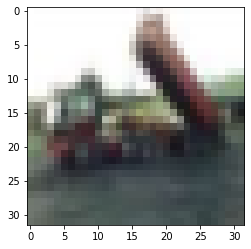

Sample input image: [[[0.10980392 0.09803922 0.03921569]
  [0.14509805 0.13333334 0.07450981]
  [0.14901961 0.13725491 0.07843138]
  ...
  [0.29803923 0.2627451  0.15294118]
  [0.31764707 0.28235295 0.16862746]
  [0.33333334 0.29803923 0.18431373]]

 [[0.12941177 0.10980392 0.05098039]
  [0.13333334 0.11764706 0.05490196]
  [0.1254902  0.10588235 0.04705882]
  ...
  [0.37254903 0.32156864 0.21568628]
  [0.3764706  0.32156864 0.21960784]
  [0.33333334 0.28235295 0.1764706 ]]

 [[0.15294118 0.1254902  0.05882353]
  [0.15686275 0.12941177 0.06666667]
  [0.22352941 0.19607843 0.12941177]
  ...
  [0.3647059  0.29803923 0.20392157]
  [0.41960785 0.34901962 0.25882354]
  [0.37254903 0.3019608  0.21176471]]

 ...

 [[0.3254902  0.28627452 0.20392157]
  [0.34117648 0.3019608  0.21960784]
  [0.32941177 0.2901961  0.20392157]
  ...
  [0.3882353  0.3647059  0.27450982]
  [0.3529412  0.32941177 0.23921569]
  [0.31764707 0.29411766 0.20392157]]

 [[0.34509805 0.28235295 0.2       ]
  [0.3529412  0.2

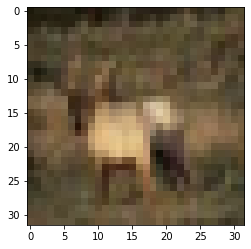

In [5]:
# visualisation of the numerical vector and 2D colour plot of the sample CIFAR imnage 2
Selected_Image = 2
image = input_X_train[Selected_Image]
print ("Sample input image: " + str(image))
plt.imshow(image)
plt.show() 

Selected_Image = 3
image = input_X_train[Selected_Image]
print ("Sample input image: " + str(image))
plt.imshow(image)
plt.show() 





**Simple CNN model definition**

This code defines a simple CNN network.
The model will learn 32 convolutional filters, each of a 3 x 3 size. The output dimension is the same one of the input shape, with a 32 x 32 filters (default stride of 1 is used). The activation function ReLU will be used. 
The network then has a max-pooling layer with pool size 2 x 2, and a dropout at 25%.

The next level of depth has a dense layer with 512 units and ReLU activation, followed by a dropout at 50%.
Finally, a softmax layer is used with 10 units/classes as output, i.e. one for each of the 10 classes of objects encoded with one-hot coding.

In [6]:
# network definition

model = Sequential()
model.add(Conv2D(32, (3, 3), padding='same', input_shape=(IMG_ROWS, IMG_COLS, IMG_CHANNELS)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
  
model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))

model.add(Dense(N_CLASSES))
model.add(Activation('softmax'))

print('CNN network definition.')

CNN network definition.


**Model compilation**

This compiles the CNN model, and then shows its summary. 


In [7]:
# compile the model
model.compile(loss='categorical_crossentropy', optimizer=OPTIM, metrics=['accuracy'])

model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 activation (Activation)     (None, 32, 32, 32)        0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 16, 16, 32)        0         
                                                                 
 flatten (Flatten)           (None, 8192)              0         
                                                                 
 dense (Dense)               (None, 512)               4194816   
                                                        

**Training of the CNN**

This line of code trains the model, saving the results in the history variable.



In [8]:
# training/fitting of the DNN model

history = model.fit(input_X_train, output_Y_train, batch_size=BATCH_SIZE, epochs=N_EPOCH, validation_split=VALIDATION_SPLIT,  verbose=VERBOSE)


Epoch 1/20
313/313 [==============================] - 13s 9ms/step - loss: 1.7549 - accuracy: 0.3851 - val_loss: 1.4103 - val_accuracy: 0.5026
Epoch 2/20
313/313 [==============================] - 2s 7ms/step - loss: 1.3756 - accuracy: 0.5114 - val_loss: 1.2607 - val_accuracy: 0.5574
Epoch 3/20
313/313 [==============================] - 2s 7ms/step - loss: 1.2523 - accuracy: 0.5566 - val_loss: 1.2634 - val_accuracy: 0.5547
Epoch 4/20
313/313 [==============================] - 2s 7ms/step - loss: 1.1600 - accuracy: 0.5922 - val_loss: 1.1557 - val_accuracy: 0.6056
Epoch 5/20
313/313 [==============================] - 2s 7ms/step - loss: 1.0837 - accuracy: 0.6210 - val_loss: 1.3802 - val_accuracy: 0.5329
Epoch 6/20
313/313 [==============================] - 2s 7ms/step - loss: 1.0270 - accuracy: 0.6402 - val_loss: 1.0415 - val_accuracy: 0.6377
Epoch 7/20
313/313 [==============================] - 2s 7ms/step - loss: 0.9679 - accuracy: 0.6618 - val_loss: 1.0885 - val_accuracy: 0.6246
Epoch

**Saving of the model and of the trained weights**

This saves the model definition and the weights, after training.



In [9]:
#save model in json format into a file
model_json = model.to_json()
open('cifar10_architecture.json', 'w').write(model_json)

#save the trained weights
model.save_weights('cifar10_weights.h5', overwrite=True)

print('Files saved for model definition and for weights.')

Model definition configuration file saved.


**Analysis of the results**

This code generates the test scores, so we can visualise and inspect the model's peformance.

It also plots the accuracy and loss values along the training timescale.


79/79 [==============================] - 0s 4ms/step - loss: 1.1180 - accuracy: 0.6497

Test score/loss: 1.117954134941101
Test accuracy: 0.6496999859809875
dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


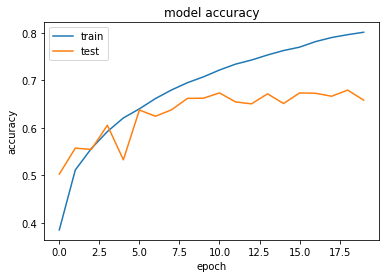

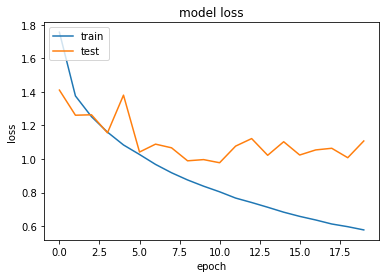

In [10]:
#Testing
score = model.evaluate(input_X_test, output_Y_test, batch_size=BATCH_SIZE, verbose=VERBOSE)
print("\nTest score/loss:", score[0])
print('Test accuracy:', score[1])

# list all data in history
print(history.history.keys())

# summarize history for accuracy
#plt.plot(mo)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()


A deeper CNN
-------------

To improve the performance of the network on the CIFAR-10 dataset, it is possible to use a deeper CNN, with a chain of multiple convolution and pooling layers.
The following network will be used:

conv+conv+maxpool+dropout+conv+conv+maxpool

The final classification layers will use the standard:

dense+dropout+dense

All the layers will use the reLu function, except the final one with the Softmax function necessary for the categorical classification 


In [11]:
# REUSE THE SAME INITIALISATION CODE AND THE TRAINING AND TEST DATA SET LOADING OPERATION

N_EPOCH = 40 # bigger network will benefit from extra training epochs

# Complex DNN model definition
model = Sequential()
 
model.add(Conv2D(32, kernel_size=3, padding='same', input_shape=(IMG_ROWS, IMG_COLS, IMG_CHANNELS)))
model.add(Activation('relu'))
model.add(Conv2D(32, kernel_size=3, padding='same'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
 
model.add(Conv2D(64, kernel_size=3, padding='same'))
model.add(Activation('relu'))
model.add(Conv2D(64, 3, 3))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
 
model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(N_CLASSES))
model.add(Activation('softmax'))


#optim = SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
model.compile(loss='categorical_crossentropy', optimizer=OPTIM, metrics=['accuracy'])

model.summary()
 


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 32, 32, 32)        896       
                                                                 
 activation_3 (Activation)   (None, 32, 32, 32)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 32, 32, 32)        9248      
                                                                 
 activation_4 (Activation)   (None, 32, 32, 32)        0         
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 16, 16, 32)       0         
 2D)                                                             
                                                                 
 dropout_2 (Dropout)         (None, 16, 16, 32)        0         
                                                      

**Training of the deeper CNN**

Let's train (fit) this new model.



In [12]:
# training/fitting of the complex DNN model 
history = model.fit(input_X_train, output_Y_train, batch_size=BATCH_SIZE, epochs=N_EPOCH, validation_split=VALIDATION_SPLIT,  verbose=VERBOSE)


Epoch 1/40
313/313 [==============================] - 4s 11ms/step - loss: 1.9559 - accuracy: 0.2721 - val_loss: 1.6414 - val_accuracy: 0.4002
Epoch 2/40
313/313 [==============================] - 3s 10ms/step - loss: 1.6506 - accuracy: 0.3917 - val_loss: 1.4942 - val_accuracy: 0.4586
Epoch 3/40
313/313 [==============================] - 3s 10ms/step - loss: 1.5016 - accuracy: 0.4506 - val_loss: 1.4926 - val_accuracy: 0.4581
Epoch 4/40
313/313 [==============================] - 3s 10ms/step - loss: 1.3995 - accuracy: 0.4956 - val_loss: 1.3870 - val_accuracy: 0.5068
Epoch 5/40
313/313 [==============================] - 3s 10ms/step - loss: 1.3152 - accuracy: 0.5277 - val_loss: 1.2696 - val_accuracy: 0.5386
Epoch 6/40
313/313 [==============================] - 3s 10ms/step - loss: 1.2514 - accuracy: 0.5530 - val_loss: 1.1179 - val_accuracy: 0.6054
Epoch 7/40
313/313 [==============================] - 3s 10ms/step - loss: 1.1953 - accuracy: 0.5735 - val_loss: 1.2533 - val_accuracy: 0.5639

**Analysis of the Deeper CNN results**

This generates the test scores and plots for the new, deeper DNN.


79/79 [==============================] - 0s 5ms/step - loss: 0.8409 - accuracy: 0.7194

Test score/loss: 0.8408565521240234
Test accuracy: 0.7193999886512756
dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


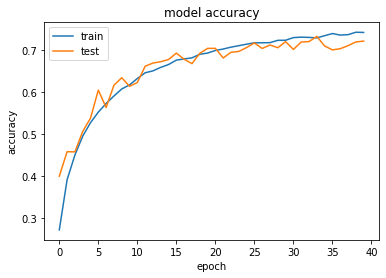

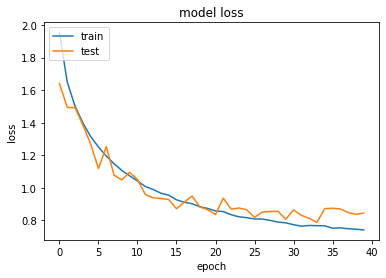

In [13]:
#Testing
score = model.evaluate(input_X_test, output_Y_test, batch_size=BATCH_SIZE, verbose=VERBOSE)
print("\nTest score/loss:", score[0])
print('Test accuracy:', score[1])

# list all data in history
print(history.history.keys())

# summarize history for accuracy
#plt.plot(mo)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

Data Augmentation
-------------

To further improve the performance of the model, it is advisable to use a larger training set, to expose the network to more variations of the images.
One way to achieve this, without having to collect new images from the real world, is to __augment__ the existing images with multiple types of transformations of the dataset stimuli. This can include rotation of the image, rescaling, horizontal/vertical flip, zooming, channel shift, etc.

Below is an example of the code that augments the current datase.




In [14]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
#from keras.datasets import cifar10

#load dataset
#(input_X_train, output_y_train), (input_X_test, output_y_test) = cifar10.load_data()

# augumenting
print("Augmenting training set images...")
    
datagen = ImageDataGenerator(
   rotation_range=40,
   width_shift_range=0.2,
   height_shift_range=0.2,
   zoom_range=0.2,
   horizontal_flip=True,
   fill_mode='nearest')

# rotation_range is a value in degrees (0 - 180) for randomly rotating pictures
# width_shift and height_shift are ranges for randomly translating pictures vertically or horizontally
# zoom_range is for randomly zooming pictures 
# horizontal_flip is for randomly flipping the images horizontally
# fill_mode fills in new pixels that can appear after a rotation or a shift


Augmenting training set images...


__Training with augmented data__

The function below used the dynamic generation of the augmented data during the training (just in time).

In [15]:

#fit the dataset
datagen.fit(input_X_train)


# train by fitting the model on batches with real-time data augmentation
history = model.fit_generator(datagen.flow(input_X_train, output_Y_train, batch_size=BATCH_SIZE), 
                              steps_per_epoch=input_X_train.shape[0]//BATCH_SIZE, epochs=N_EPOCH, verbose=VERBOSE)



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  import sys


Epoch 1/40
50000/50000 [==============================] - 25s 484us/step - loss: 1.4898 - accuracy: 0.4826


**Analysis of the Data Augmented, Deeper CNN results**

This generates the test scores and plots for the deeper DNN trained on the augmented data.


10000/1 [==============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================


Test score/loss: 1.4072907333374023
Test accuracy: 0.4937
dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


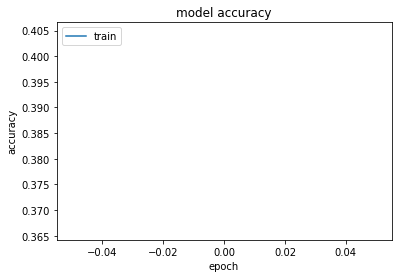

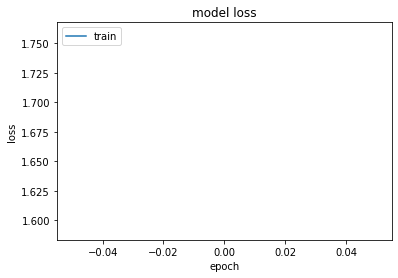

In [ ]:
#Testing
score = model.evaluate(input_X_test, output_Y_test, batch_size=BATCH_SIZE, verbose=VERBOSE)
print("\nTest score/loss:", score[0])
print('Test accuracy:', score[1])

# list all data in history
print(history.history.keys())

# summarize history for accuracy
#plt.plot(mo)
plt.plot(history.history['accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# summarize history for loss
plt.plot(history.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()



Below is a commented different example of a data augmentation approach. 

But we have carried out plenty of slow, long simulations for this class, and we can stop here.

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        rotation_range=0,  # randomly rotate images in the range (degrees, 0 to 180)
        width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
        horizontal_flip=True,  # randomly flip images
        vertical_flip=False)  # randomly flip images

datagen.fit(input_X_train)

Conclusions
-------------

Today we learned to train more complex DNNs, and to use data augmentation to further improve the network training and performance.

**Copyright (c)** 2022 Angelo Cangelosi, MIT License. Code and examples adapted from Gulli & Pal (2017) Deep Learning with Kera. Punkt Publishing. With support from Wenjie Huang.